In [1]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers.core import Dense

In [3]:
titanic = pd.read_excel('/gdrive/My Drive/Colab Notebooks/9주차/titanic.xls')
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   survived  1309 non-null   int64  
 2   name      1309 non-null   object 
 3   sex       1309 non-null   object 
 4   age       1046 non-null   float64
 5   sibsp     1309 non-null   int64  
 6   parch     1309 non-null   int64  
 7   ticket    1309 non-null   object 
 8   fare      1308 non-null   float64
 9   cabin     295 non-null    object 
 10  embarked  1307 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 112.6+ KB


In [4]:
#결측치 확인
titanic.isna().sum()

pclass         0
survived       0
name           0
sex            0
age          263
sibsp          0
parch          0
ticket         0
fare           1
cabin       1014
embarked       2
dtype: int64

In [5]:
#결측치 처리하기
# age:평균값
titanic.age.fillna(value=titanic.age.mean(), inplace=True)
#fare:삭제하기
titanic = titanic[titanic['fare'].notnull()]

In [6]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1308 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1308 non-null   int64  
 1   survived  1308 non-null   int64  
 2   name      1308 non-null   object 
 3   sex       1308 non-null   object 
 4   age       1308 non-null   float64
 5   sibsp     1308 non-null   int64  
 6   parch     1308 non-null   int64  
 7   ticket    1308 non-null   object 
 8   fare      1308 non-null   float64
 9   cabin     295 non-null    object 
 10  embarked  1306 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 122.6+ KB


In [7]:
# sex : 숫자로 변경
titanic.sex = titanic.sex.map({'male' : 0, 'female' : 1})
titanic.sex

0       1
1       0
2       1
3       0
4       1
       ..
1304    1
1305    1
1306    0
1307    0
1308    0
Name: sex, Length: 1308, dtype: int64

In [8]:
# 정수 데이터를 실수형으로 변경
titanic['survived'] = titanic['survived'].astype('float')
titanic['pclass'] = titanic['pclass'].astype('float')
titanic['sex'] = titanic['sex'].astype('float')
titanic['sibsp'] = titanic['sibsp'].astype('float')
titanic['parch'] = titanic['parch'].astype('float')


In [9]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1308 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1308 non-null   float64
 1   survived  1308 non-null   float64
 2   name      1308 non-null   object 
 3   sex       1308 non-null   float64
 4   age       1308 non-null   float64
 5   sibsp     1308 non-null   float64
 6   parch     1308 non-null   float64
 7   ticket    1308 non-null   object 
 8   fare      1308 non-null   float64
 9   cabin     295 non-null    object 
 10  embarked  1306 non-null   object 
dtypes: float64(7), object(4)
memory usage: 122.6+ KB


In [10]:
#데이터세트 생성
x_data = titanic[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare']]
y_data = titanic['survived']

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data,
                                                    test_size=0.1, random_state=7)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1177, 6), (131, 6), (1177,), (131,))

In [11]:
#모델 구성하기
model = Sequential()
model.add(Dense(128, input_shape=(6, ), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

#학습 과정 설정하기
model.compile(loss='mse', optimizer='Adam', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               896       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 9,217
Trainable params: 9,217
Non-trainable params: 0
_________________________________________________________________


In [12]:
h = model.fit(x_train, y_train, validation_split=0.2, epochs=100)

Epoch 1/100
30/30 [==============================] - 1s 8ms/step - loss: 0.2701 - accuracy: 0.6536 - val_loss: 0.2547 - val_accuracy: 0.6441
Epoch 2/100
30/30 [==============================] - 0s 2ms/step - loss: 0.2229 - accuracy: 0.6674 - val_loss: 0.2877 - val_accuracy: 0.6314
Epoch 3/100
30/30 [==============================] - 0s 3ms/step - loss: 0.2401 - accuracy: 0.6716 - val_loss: 0.2034 - val_accuracy: 0.7585
Epoch 4/100
30/30 [==============================] - 0s 2ms/step - loss: 0.2050 - accuracy: 0.7003 - val_loss: 0.1865 - val_accuracy: 0.7076
Epoch 5/100
30/30 [==============================] - 0s 2ms/step - loss: 0.1948 - accuracy: 0.7099 - val_loss: 0.1993 - val_accuracy: 0.6780
Epoch 6/100
30/30 [==============================] - 0s 2ms/step - loss: 0.1888 - accuracy: 0.7311 - val_loss: 0.1768 - val_accuracy: 0.7839
Epoch 7/100
30/30 [==============================] - 0s 2ms/step - loss: 0.1928 - accuracy: 0.7216 - val_loss: 0.1713 - val_accuracy: 0.7839
Epoch 8/100
3

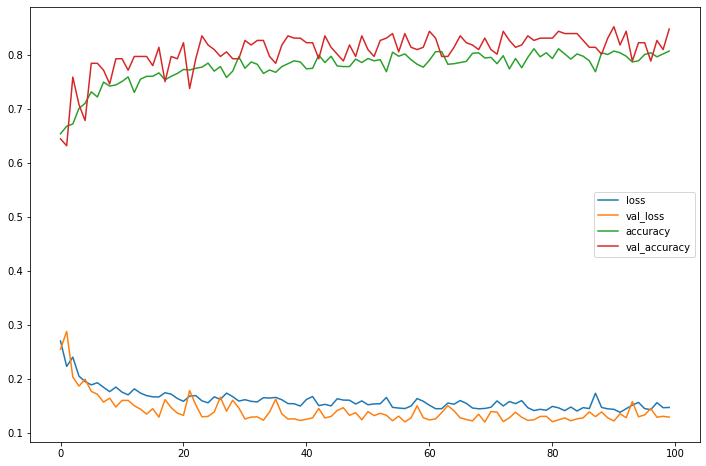

In [13]:
# 그래프 그리기
plt.figure(figsize=(12, 8))
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.legend(['loss', 'val_loss', 'accuracy', 'val_accuracy'])
plt.show()

In [16]:
#모델 평가하기
loss, accuracy = model.evaluate(x_test, y_test)
print('Loss = {:.2f}'.format(loss))
print('Accuracy = {:.2f}'.format(accuracy))

5/5 [==============================] - 0s 2ms/step - loss: 0.1576 - accuracy: 0.7786
Loss = 0.16
Accuracy = 0.78


In [17]:
w = np.array([1., 1., 17., 1., 2., 100.]).reshape(1, 6)
model.predict(w)

array([[0.9818204]], dtype=float32)